# 나이브 베이즈

나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하게 독립적인 사건으로 가정하고, 이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.

조건부확률
P(A|B) = P(B|A) * P(A) / P(B)

### 특징이 여러 개인 경우의 나이브 베이즈 공식
P(y|x1,・・・,xn) = P(x1|y)P(x2|y)・・・P(xn|y)P(y) / P(x1)P(x2)・・・P(xn)

나이브베이즈에서는 레이블 확률의 대소 비교만 필요하므로 공통 분모를 제거해서 계산량을 줄일 수 있다.  
y = argmax P(x1|y)P(x2|y)・・・P(xn|y)P(y)  


### 1) 가우시안 나이브 베이즈 분류
- 가우시안 나이브 베이즈 분류(gaussian naive bayes)는 특징들의 값들이 정규 분포(가우시안 분포) 돼 있다는 가정 하에 조건부 확률을 계산하며, 연속적인 성질이 있는 특징이 있는 데이터를 분류하는 데 적합하다.
- 꽃받침 길이에 따른 iris(붓꽃) 분포도

나이즈베이즈에서 데이터가 이산적(discrete)이지 않고, 데이터 특징들이 연속적인 경우에는 가우시안 나이브 베이즈 분류를 사용하는 것을 추천한다

이산적인 데이터의 경우 사이킷런의 아래 두 가지 나이브 베이즈 분류 모델(다항 분포 나이브 베이즈, 베르누이 나이브 베이즈) 중 하나를 상황에 맞게 사용한다.

### 2) 다항 분포 나이브 베이즈(Multinomial Naive Bayes)

데이터의 특징이 출현 횟수로 표현됐을 때 사용한다. 예를 들어, 주사위를 10번 던졌을 때 1이 한 번, 2가 두 번, 3이 세 번, 4가 네 번 나왔을 경우,
주사위를 10번 던진 결과 데이터를 (1,2,3,4,0,0)으로 나타낼 수 있다.

이런 식으로 데이터의 출현 횟수에 따라 값을 달리한 데이터에는 다항 분포 나이브 베이즈 모델을 사용한다.

### 3) 베르누이 나이브 베이즈 모델(Bernoulli Naive Bayes)
데이터의 특징이 0 또는 1로 표현됐을 때 사용한다. 예를 들어 주사위를 10번 던졌을 때 1이 한 번, 2가 두 번, 3이 세 번, 4가 네 번 나왔을 경우,
주사위를 10번 던진 결과 데이터를 (1,1,1,1,0,0)과 같이 나타낼 수 있다.

이런식으로 데이터의 출현 여부에 따라 1 또는 0으로 구분됐을 때 베르누이 나이브 베이즈 모델을 사용한다.

- **가우시안 나이브 베이즈 분류** : 붓꽃(iris) 데이터셋 분류
- **베르누이 나이브 베이즈 분류** : 스팸 메일 분류
- **다항 분포 나이브 베이즈 분류** : 영화 감상평을 토대로 긍정적/부정적 리뷰 분류

#### 장점
- 고차원 데이터를 처리하기 쉽다
- 문서 분류 및 스팸 메일 분류에 강하다
- 구현하기 쉽다
- 학습 및 추론 시간이 빠르다

#### 단점
- 모든 변수가 독립변수라는 가설 하에 작동함으로써 데이터가 가설과 다를 경우 정확도가 낮아진다.

# 가우시안 나이브 베이즈를 활용한 붓꽃 분류

In [4]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트합니다
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 데이터 획득

In [8]:
# iris 데이터 불러옴
dataset = load_iris()

# pandas의 데이터 프레임으로 데이터를 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 레이블(타깃)을 데이터프레임에 저장
df['target'] = dataset.target

# 숫자 형태의 레이블을 이해를 돕기 위해 문자로 변경
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.target.value_counts()

setosa        50
virginica     50
versicolor    50
Name: target, dtype: int64

- sepal length(cm): 꽃받침 길이
- sepal width(cm): 꽃받침 너비
- petal length(cm): 꽃잎 길이
- petal width(cm): 꽃잎 너비
- target: 붓꽃(iris)의 종류(setosa, versicolor, virginica)

# iris 데이터 시각화 (분포도 확인)

아래 그래프에서 볼 수 있듯, iris 데이터의 분포도가 정규분포(Gaussian Distribution)과 유사하다

In [11]:
setosa_df = df[df.target=='setosa']
versicolor_df = df[df.target=='versicolor']
virginica_df = df[df.target=='virginica']

### sepal length (cm) 

<AxesSubplot:label='2da8bcd3-ca28-4815-b882-b610a3fa62b7'>

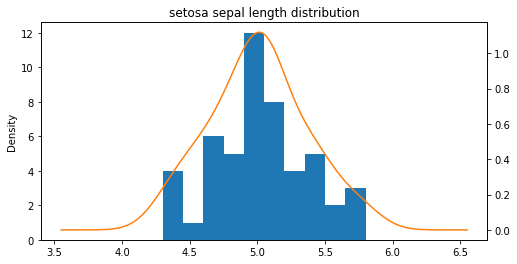

In [14]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'setosa sepal length distribution',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='b6e29f3b-11a3-4eca-83ad-bc6867552c01'>

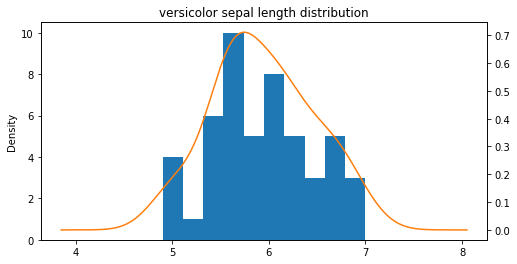

In [15]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'versicolor sepal length distribution',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='ccf77edb-a2af-41a2-84d0-0ee771ed4b4b'>

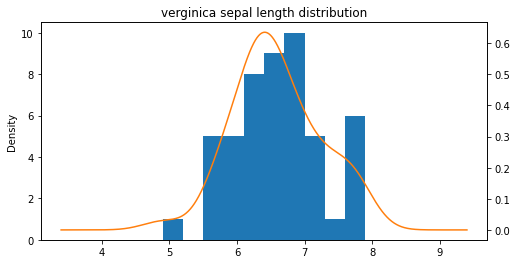

In [16]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'verginica sepal length distribution',
                                    figsize = (8,4)
                                   )

### sepal width (cm)

<AxesSubplot:label='2382c75e-b4eb-466b-a3d6-4d1ec2f58d6e'>

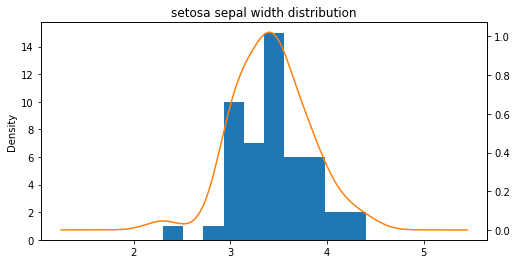

In [18]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'setosa sepal width',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='309a545e-4aa7-44d2-9721-131695533bdc'>

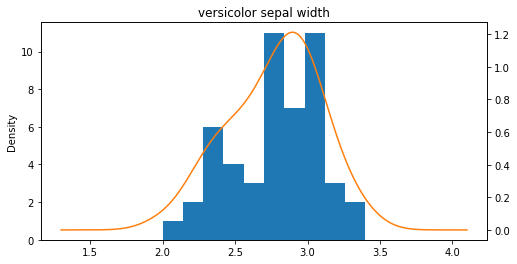

In [19]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'versicolor sepal width',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='d1d7f033-d67b-4fae-be8c-9466e7c2fdf5'>

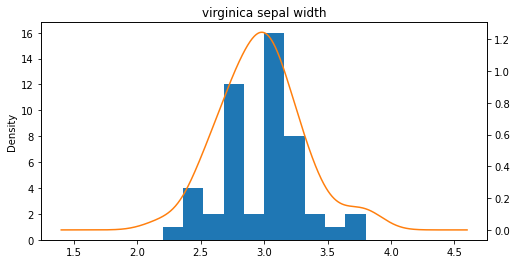

In [20]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'virginica sepal width',
                                    figsize = (8,4)
                                   )

### petal length (cm)

<AxesSubplot:label='ef5ff6a8-9aa9-4510-bb66-5aa3e6bc646c'>

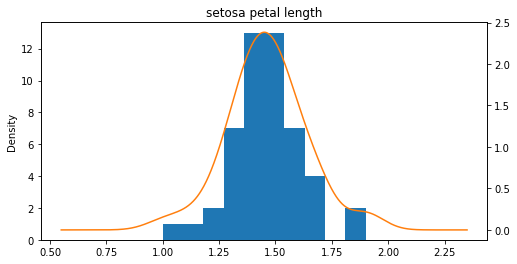

In [21]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'setosa petal length',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='a4a0cb0d-4d4c-46f2-89b0-c8075dc035d7'>

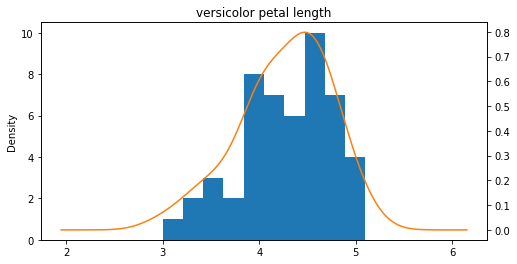

In [22]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'versicolor petal length',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='c860bf54-4e81-4978-a78d-6110f25e55e4'>

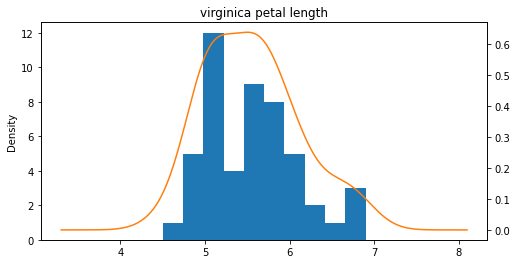

In [23]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'virginica petal length',
                                    figsize = (8,4)
                                   )

### petal width(cm)

<AxesSubplot:label='e9c83c54-6e3d-4c16-b885-3de52b821f6e'>

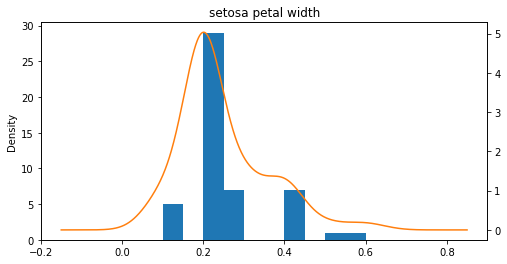

In [24]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'setosa petal width',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='3416cd8f-ff53-4bfc-9510-0bac89caba80'>

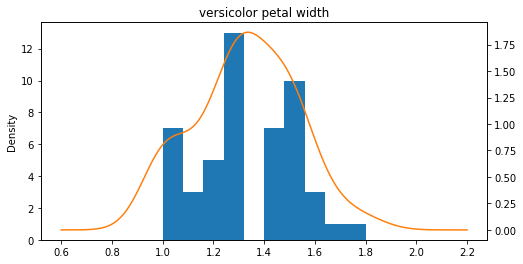

In [25]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'versicolor petal width',
                                    figsize = (8,4)
                                   )

<AxesSubplot:label='13452e5d-092a-498a-805a-1de5609a5561'>

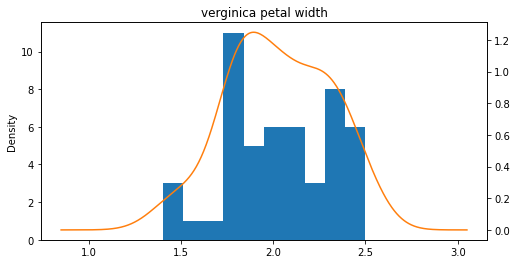

In [26]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde',
                                    ax = ax,
                                    secondary_y = True,
                                    title = 'verginica petal width',
                                    figsize = (8,4)
                                   )

### 데이터 다듬기

전체 데이터 중 20%를 테스트 데이터로 분리하고, 나머지 80%를 학습에 사용한다.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

# 가우시안 나이브 베이즈 모델 학습

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# 테스트

In [31]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [32]:
accuracy_score(y_test, predicted)

0.9333333333333333

In [33]:
## Confusion Matrix

In [34]:
print(metrics.confusion_matrix(expected, predicted))

[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
